# A1-Q5 Spline Construction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given points
x = np.array([-2, 0, 1, 3, 6])
y = np.array([2, -1, -1, 3, 2])

## (a)

In [2]:
# Step 1: Calculate Delta x and Delta y
delta_x = np.diff(x)
delta_y = np.diff(y) / delta_x

# Step 2: Construct the tridiagonal matrix T
n = len(x)
T = np.zeros((n, n))

# Fill interior rows (Equation 2.5.12)
for i in range(1, n-1):
    T[i, i-1] = delta_x[i]
    T[i, i] = 2 * (delta_x[i-1] + delta_x[i])
    T[i, i+1] = delta_x[i-1]

# Boundary conditions (clamped, S'(x1) = 1, S'(xn) = 1)
T[0, 0] = 1
T[-1, -1] = 1

# Step 3: Construct the right-hand side vector r
r = np.zeros(n)

# Fill interior rows (Equation 2.5.5)
for i in range(1, n-1):
    r[i] = 3 * (delta_x[i] * delta_y[i-1] + delta_x[i-1] * delta_y[i])

# Boundary conditions
r[0] = 1  # S'(x1) = 1
r[-1] = 1  # S'(xn) = 1

print(f"delta_x = {delta_x}")
print(f"delta_y = {delta_y}")
print(f"T =\n{T}")
print(f"r = {r}")

delta_x = [2 1 2 3]
delta_y = [-1.5         0.          2.         -0.33333333]
T =
[[ 1.  0.  0.  0.  0.]
 [ 1.  6.  2.  0.  0.]
 [ 0.  2.  6.  1.  0.]
 [ 0.  0.  3. 10.  2.]
 [ 0.  0.  0.  0.  1.]]
r = [ 1.  -4.5  6.  16.   1. ]


## (b)

In [3]:
# Step 4: Solve the linear system T * s = r
s = np.linalg.solve(T, r)
print(f"s = {s}")

# Step 5: Calculate spline coefficients a, b, c, d
a = y[:-1]
b = s[:-1]
c = (3 * delta_y - 2 * s[:-1] - s[1:]) / delta_x
d = (s[:-1] + s[1:] - 2 * delta_y) / (delta_x ** 2)

print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print(f"d = {d}")

s = [ 1.         -1.34271523  1.2781457   1.01655629  1.        ]
a = [ 2 -1 -1  3]
b = [ 1.         -1.34271523  1.2781457   1.01655629]
c = [-2.57864238  1.40728477  1.21357616 -1.34437086]
d = [ 0.66432119 -0.06456954 -0.4263245   0.29813588]


## (c)

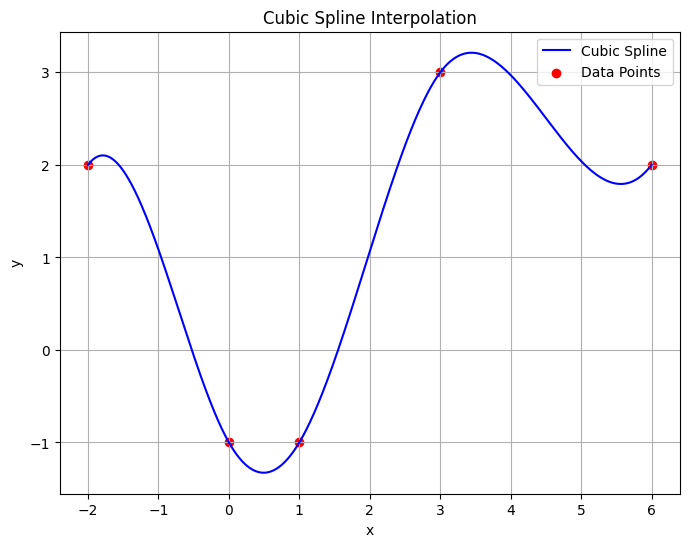

In [4]:
# Step 6: Define the cubic spline function
def cubic_spline(x_val, x, a, b, c, d):
    for i in range(len(x) - 1):
        if x[i] <= x_val <= x[i+1]:
            dx = x_val - x[i]
            return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3
    return None

# Step 7: Visualize the cubic spline
x_vals = np.linspace(x[0], x[-1], 1000)
y_vals = [cubic_spline(val, x, a, b, c, d) for val in x_vals]

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Cubic Spline', color='blue')
plt.scatter(x, y, color='red', label='Data Points')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('q5c.png')
plt.show()
plt.close()